In [1]:
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pylab
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import csv
from textblob import TextBlob

%matplotlib inline

In [2]:
leaders_accounts = [
    'realDonaldTrump',
    'BernieSanders',
    'JoeBiden',
    'CanadianPM',
    'JustinTrudeau',
    'AndrewScheer',
    'lopezobrador_',
    'JoseAMeadeK',
    'narendramodi',
    'PMOIndia',
    'INCIndia',
    'jairbolsonaro',
    'LulaOficial',
    'alferdez',
    'mauriciomacri',
    'BorisJohnson',
    'jeremycorbyn',
    'Keir_Starmer',
    'RoyalFamily',
    'MBuhari',
    'atiku',
    'PresidencyZA',
    'CyrilRamaphosa',
    'jsteenhuisen',
    'KingSalman',
    'ScottMorrisonMP',
    'thePMO',
    'AlboMP',
    'EmmanuelMacron',
    'laurentwauquiez'
]

In [44]:
def clean_tweet(tweet):
    tweet = tweet.lower()
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", tweet)

In [45]:
def get_tweets_list(account):
    tweets = []
    with open(f'./data/{account}.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        keys = next(csv_reader)
        for row in csv_reader:
            tweet = {}
            tweet[keys[0]] = row[0]
            tweet[keys[1]] = row[1]
            tweet[keys[6]] = clean_tweet(row[6])
            tweets.append(tweet)
    return tweets

def get_tweets(username):
    l = get_tweets_list('realDonaldTrump')
    l.reverse()
    return l

In [228]:
ACTIVE_ACC = [
    'realDonaldTrump',
    'BernieSanders',
    'JoeBiden',
    'CanadianPM',
    'JustinTrudeau',
    'AndrewScheer',
    'BorisJohnson',
    'jeremycorbyn',
    'Keir_Starmer',
    'RoyalFamily',
    'thePMO',
    'AlboMP'
]

In [226]:
# # verify start and end data for all accounts
# for acc in leaders_accounts:
#     tl = get_tweets_list(acc)
#     s = tl[0]['date']
#     e = tl[-1]['date']
#     print(f'acc: {acc}, start: {s}, end: {e}')

### Wordclouds
First, let's compare some of the worlds biggest leaders tweets by looking at wordclouds.

In [47]:
def generate_wordcloud(tweets):
    tweets_con = ''
    for t in tweets:
        tweets_con += t['text']
    return WordCloud().generate(tweets_con)

In [105]:
trump_tweets = get_tweets_list('realDonaldTrump')
boris_tweets = get_tweets_list('BorisJohnson')
modi_tweets = get_tweets_list('narendramodi')
trudeau_tweets = get_tweets_list('JustinTrudeau')

trump_tweets.reverse()
boris_tweets.reverse()
modi_tweets.reverse()
trudeau_tweets.reverse()

trump_wc = generate_wordcloud(trump_tweets)
boris_wc = generate_wordcloud(boris_tweets)
modi_wc = generate_wordcloud(modi_tweets)
trudeau_wc = generate_wordcloud(trudeau_tweets)

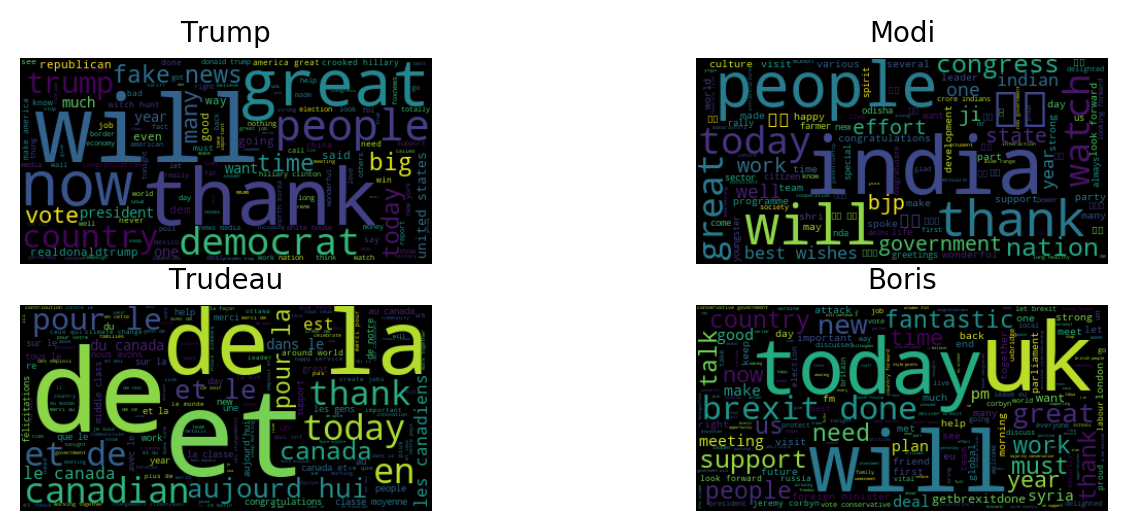

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(8, 3), dpi=200)

ax[0][0].set_title('Trump', fontsize=10)
ax[0][1].set_title('Modi', fontsize=10)
ax[1][0].set_title('Trudeau', fontsize=10)
ax[1][1].set_title('Boris', fontsize=10)

ax[0][0].imshow(trump_wc, interpolation='bilinear')
ax[0][1].imshow(modi_wc, interpolation='bilinear')
ax[1][0].imshow(trudeau_wc, interpolation='bilinear')
ax[1][1].imshow(boris_wc, interpolation='bilinear')
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')
plt.show()

In [107]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/duncangrubbs/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Define Analysis Methods

In [243]:
def get_tweets_range(tweets, start, end):
    active = False
    sub_section = []
    for tweet in tweets:
        if tweet['date'].split(' ')[0] == start:
            active = True
        if tweet['date'].split(' ')[0] == end:
            break
        if active:
            sub_section.append(tweet)
    return sub_section

assert len(get_tweets_range(trump_tweets, '2016-04-13', '2017-04-13')) == 2986

In [247]:
def average_sent(tweets):
    pol = []
    sub = []
    time = []
    for year in range(16, 20):
        for month in range(1, 13, 2):
            if (month < 10):
                start = f'20{year}-0{month}-01'
            else:
                start = f'20{year}-{month}-01'
            if (month + 1 < 10):
                end = f'20{year}-0{month+1}-30'
            else:
                end = f'20{year}-{month}-30'
            tweet_ir = get_tweets_range(tweets, start, end)
            p = 0
            s = 0
            for tweet in tweet_ir:
                ss = TextBlob(tweet['text']).sentiment
                p += ss[0]
                s += ss[1]
            if (len(tweet_ir) != 0):
                p /= len(tweet_ir)
                s /= len(tweet_ir)
            pol.append(p)
            sub.append(s)
            time.append(start)
    return (pol, sub), time

sent, time = average_sent(trudeau_tweets)

In [215]:
def sentiment_over_time(tweets, jump):
    '''
    Return sentiment and time arrays for plotting
    where the sentiment is retrived with the TextBlob library.
    This returns both subjectivity and polarity.
    '''
    pol = []
    sub = []
    time = []
    it = int(len(tweets)/jump)
    for tweet in tweets[0::it]:
        ss = TextBlob(tweet['text']).sentiment
        pol.append(ss[0])
        sub.append(ss[1])
        date = tweet['date'].split(' ')[0]
        time.append(date)
    return (pol, sub), time

def length_over_time(tweets, jump):
    '''Return the tweet length over time. (i.e length and time arrays)'''
    lengths = []
    time = []
    it = int(len(tweets)/jump)
    for tweet in tweets[0::it]:
        lengths.append(len(tweet['text']))
        date = tweet['date'].split(' ')[0]
        time.append(date)
    return lengths, time

def plot_length_over_time(lengths, t, title):
    plt.figure(figsize=(12, 9))
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel("Date", fontsize=16)  
    plt.ylabel("# of Characters", fontsize=16)  
    plt.plot(t, lengths, color="#3F5D7D", marker='o')
    plt.show()

def plot_sentiment_over_time(sent, time, title):
    plt.figure(figsize=(12, 9))
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=16)  
    plt.ylabel('Sentiment Score', fontsize=16)  
    plt.plot(time, sent[0], label='Polarity', color='#3F5D7D', marker='o')
    plt.plot(time, sent[1], label='Subjectivity', color='orange', marker='o')
    plt.legend(loc='lower left', fontsize=14)
#     plt.savefig('sentiment.png', dpi=300)
    plt.show()
    
def plot_sentiment_scatter(sent1, sent2, title):
    plt.figure(figsize=(12, 9))
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.xlabel('Polarity (lower is better)', fontsize=16)  
    plt.ylabel('Subjectivity (close to 0 is better)', fontsize=16)  
    plt.scatter(sent1[1], sent1[0], label='Trudeau', color='#3F5D7D')
    plt.scatter(sent2[1], sent2[0], label='Trump', color='orange')
#     plt.savefig('sentiment.png', dpi=300)
    plt.legend(loc='lower left', fontsize=14)
    plt.show()
    
def get_tweets_with_keyword(tweets, keyword):
    new_tweets = [tweet for tweet in tweets if keyword in tweet['text']]
    return new_tweets

In [224]:
# ll, tt = length_over_time(trump_tweets)
# plot_length_over_time(ll, tt, 'Boris\'s Tweet Length Over Time')

sent, time = tb_sentiment_over_time(trudeau_tweets, 30)

# sent1, time = tb_sentiment_over_time(trudeau_tweets, 500)
# sent2, time = tb_sentiment_over_time(trump_tweets, 500)

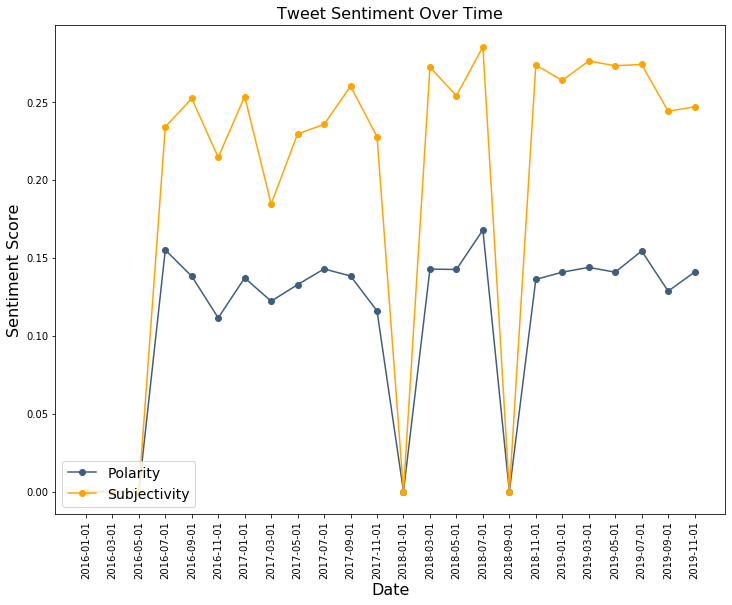

In [248]:
plot_sentiment_over_time(sent, time, 'Tweet Sentiment Over Time')
# plot_sentiment_scatter(sent1, sent2, 'Tweet Sentiment Trump vs. Trudeau')